In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [2]:
df = pd.read_csv('medical_insurance.csv')

In [3]:
df.shape

(100000, 54)

# **CALIDAD DEL DATO**

### Integridad

In [4]:
total_cells = df.shape[0] * df.shape[1]
missing_values = df.isna().sum().sum()

Integridad_KPI = 100 * (1 - missing_values/total_cells)
print(f'KPI Integridad : {Integridad_KPI: .2f}%')

missing_by_col = 100 * df.isna().sum() / df.shape[0]
print(missing_by_col)

KPI Integridad :  99.44%
person_id                       0.000
age                             0.000
sex                             0.000
region                          0.000
urban_rural                     0.000
income                          0.000
education                       0.000
marital_status                  0.000
employment_status               0.000
household_size                  0.000
dependents                      0.000
bmi                             0.000
smoker                          0.000
alcohol_freq                   30.083
visits_last_year                0.000
hospitalizations_last_3yrs      0.000
days_hospitalized_last_3yrs     0.000
medication_count                0.000
systolic_bp                     0.000
diastolic_bp                    0.000
ldl                             0.000
hba1c                           0.000
plan_type                       0.000
network_tier                    0.000
deductible                      0.000
copay                    

Nan solo en alcohol_freq, que se podria transformar en un str 'Never'

### Consistencia

In [5]:
#Columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cat_scores = []
for col in categorical_cols:
    col_lower = col.lower()
    if col_lower == 'sex':
        valid = set(['Female', 'Male', 'Other'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'region':
        valid = set(['North', 'Central', 'West', 'South', 'East'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'urban_rural':
        valid = set(['Suburban', 'Urban', 'Rural'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'education':
        valid = set(['Doctorate', 'No HS', 'HS', 'Some College', 'Masters', 'Bachelors'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'marital_status':
        valid = set(['Married', 'Single', 'Divorced', 'Widowed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'employment_status':
        valid = set(['Retired', 'Employed', 'Self-employed', 'Unemployed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'smoker':
        valid = set(['Never', 'Current', 'Former'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'alcohol_freq':
        valid = set(['None', 'Weekly', 'Daily', 'Occasional'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'plan_type':
        valid = set(['PPO', 'POS', 'HMO', 'EPO'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'network_tier':
        valid = set(['Bronze', 'Gold', 'Platinum', 'Silver'])
        score = 100 * df[col].isin(valid).mean()
    else:
        #Para el resto solo se comprueba que no sea nula
        score = 100 * (1 - df[col].isnull().mean())
    cat_scores.append(score)

num_scores = []
for col in numeric_cols:
    coerced = pd.to_numeric(df[col], errors='coerce')
    score = 100 * (1 - coerced.isnull().mean())
    num_scores.append(score)

if len(categorical_cols) + len(numeric_cols) > 0:
    Consistencia_KPI = (sum(cat_scores) + sum(num_scores)) / (len(cat_scores) + len(num_scores))
else:
    Consistencia_KPI = 100.0

print(f"\nConsistencia (KPI): {Consistencia_KPI:.2f} %")


Consistencia (KPI): 99.44 %


### Validez

Como no conocemos los valores tipicos de la mayoria de nuestras columnas solo vamos a mirar el describe y los min-max que propone y ver si algo nos parece sorprendente.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_id,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.5000,75000.2500,100000.00
age,100000.0,47.521500,15.988752,0.00,37.0000,48.0000,58.0000,100.00
income,100000.0,49873.905000,46800.214127,1100.00,21100.0000,36200.0000,62200.0000,1061800.00
household_size,100000.0,2.430900,1.075126,1.00,2.0000,2.0000,3.0000,9.00
dependents,100000.0,0.898380,0.950654,0.00,0.0000,1.0000,1.0000,7.00
bmi,100000.0,26.990512,4.994883,12.00,23.6000,27.0000,30.4000,50.40
visits_last_year,100000.0,1.927650,1.737730,0.00,1.0000,2.0000,3.0000,25.00
hospitalizations_last_3yrs,100000.0,0.093640,0.304848,0.00,0.0000,0.0000,0.0000,3.00
days_hospitalized_last_3yrs,100000.0,0.373350,1.373011,0.00,0.0000,0.0000,0.0000,21.00
medication_count,100000.0,1.236320,1.209358,0.00,0.0000,1.0000,2.0000,11.00


### Unicidad

In [7]:
total_rows = df.shape[0]
duplicated_rows = df.duplicated().sum()

Unicidad_KPI = 100* (1- duplicated_rows/total_rows)
print(f'KPI Unicidad : {Unicidad_KPI}%')

KPI Unicidad : 100.0%


### Precision

In [8]:
precision_scores = []


for col in numeric_cols:
    col_mean = df[col].mean()
    col_std = df[col].std()
    lower, upper = col_mean - 3 * col_std, col_mean + 3 * col_std
    in_range = df[col].between(lower, upper, inclusive='both')
    score = 100 * in_range.mean()
    precision_scores.append(score)

if len(precision_scores) > 0:
    Precision_KPI = sum(precision_scores) / len(precision_scores)
else:
    Precision_KPI = 100.0

print(f"\nPrecisión (KPI proxy): {Precision_KPI:.2f} %")


Precisión (KPI proxy): 98.26 %


In [9]:
kpis = {
    'Integridad': Integridad_KPI,
    'Consistencia': Consistencia_KPI,
    'Unicidad': Unicidad_KPI,
    'Precisión': Precision_KPI
}

def kpi_color(value):
    if value < 50:
        return 'red'
    elif value < 80:
        return 'orange'
    else:
        return 'green'

fig = make_subplots(
    rows=1, cols=4,
    specs=[[{'type':'indicator'}]*4]
)

for idx, (name, value) in enumerate(kpis.items()):
    fig.add_trace(go.Indicator(
    mode='gauge+number',
    value=value,
    title={'text': name, 'font': {'size': 16}},
    gauge={
        'axis': {'range':[0,100]},
        'bar': {'color': kpi_color(value)},
        'steps': [
            {'range':[0,50],'color':'lightcoral'},
            {'range':[50,80],'color':'khaki'},
            {'range':[80,100],'color':'lightgreen'}
        ],
    },
    number={'suffix':' %', 'font':{'size':26}, 'valueformat':'.2f'}  # <-- aquí
), row=1, col=idx+1)


fig.update_layout(
    title={'text':'Dashboard de Calidad de Datos','x':0.5,'font':{'size':22}},
    height=300, width=1000, margin=dict(t=80, b=20)
)

fig.show()

# **Tratamiento**

In [10]:
vals = df['alcohol_freq'].unique().tolist()
missing_percentage = round(100 * float(df['alcohol_freq'].isna().sum() / df.shape[0]),1)

print(f"{vals} son los valores de la columna")
print(f'Los nan representan {missing_percentage}%  de esas')

[nan, 'Weekly', 'Daily', 'Occasional'] son los valores de la columna
Los nan representan 30.1%  de esas


Como podemos ver no hay una opcion para los que no beben alcohol en absoluto. Asi podemos suponer que los nan no viene de datos faltantes sino que de gente que nunca consuma alcohol. Para confirmar eso necesitariamos la proporcion de no-bebedores en los EEUU.  
Despues de una rapida investigacion, nuestra hipotesis parece justa : https://www.cdc.gov/nchs/products/databriefs/db374.htm ya que se expecte un 30% de no bebedores.  
  
Entonces vamos a asignar un valor de 'Never' a los nan de la columna a fin de que sea mas claro que los datos no son faltantes y tienen sentidos.

In [11]:
df['alcohol_freq'] = df['alcohol_freq'].fillna('Never')

In [12]:
df

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,...,0,0,0,0,0,1,0,0,0,0
99996,54887,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,...,0,0,0,0,0,0,0,0,0,0
99997,76821,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,...,0,0,0,1,0,1,0,0,0,0
99998,861,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,...,0,0,1,0,0,2,2,1,0,0


In [13]:
df['alcohol_freq'].unique()

array(['Never', 'Weekly', 'Daily', 'Occasional'], dtype=object)

Vamos a cambiar algunas columnas numericas que nos parecen importante para la segmentacion en numéricas ordenales. Asi el algoritmo de PCA podra tomarles en cuenta.

In [14]:
map_education = {'No HS':0, 'HS':1, 'Some College':2, "Bachelors":3, 'Masters':4, 'Doctorate':5}
map_smoker = {'Never' : 0, 'Former' : 2, 'Current' : 4}
map_alcohol = {'Never' : 0, 'Occasional' : 1, 'Weekly' : 2, 'Daily': 3}

In [15]:
df['education'] = df['education'].map(lambda x: map_education[x])
df['smoker'] = df['smoker'].map(lambda x: map_smoker[x])
df['alcohol_freq'] = df['alcohol_freq'].map(lambda x: map_alcohol[x])

Analisis exploratoria

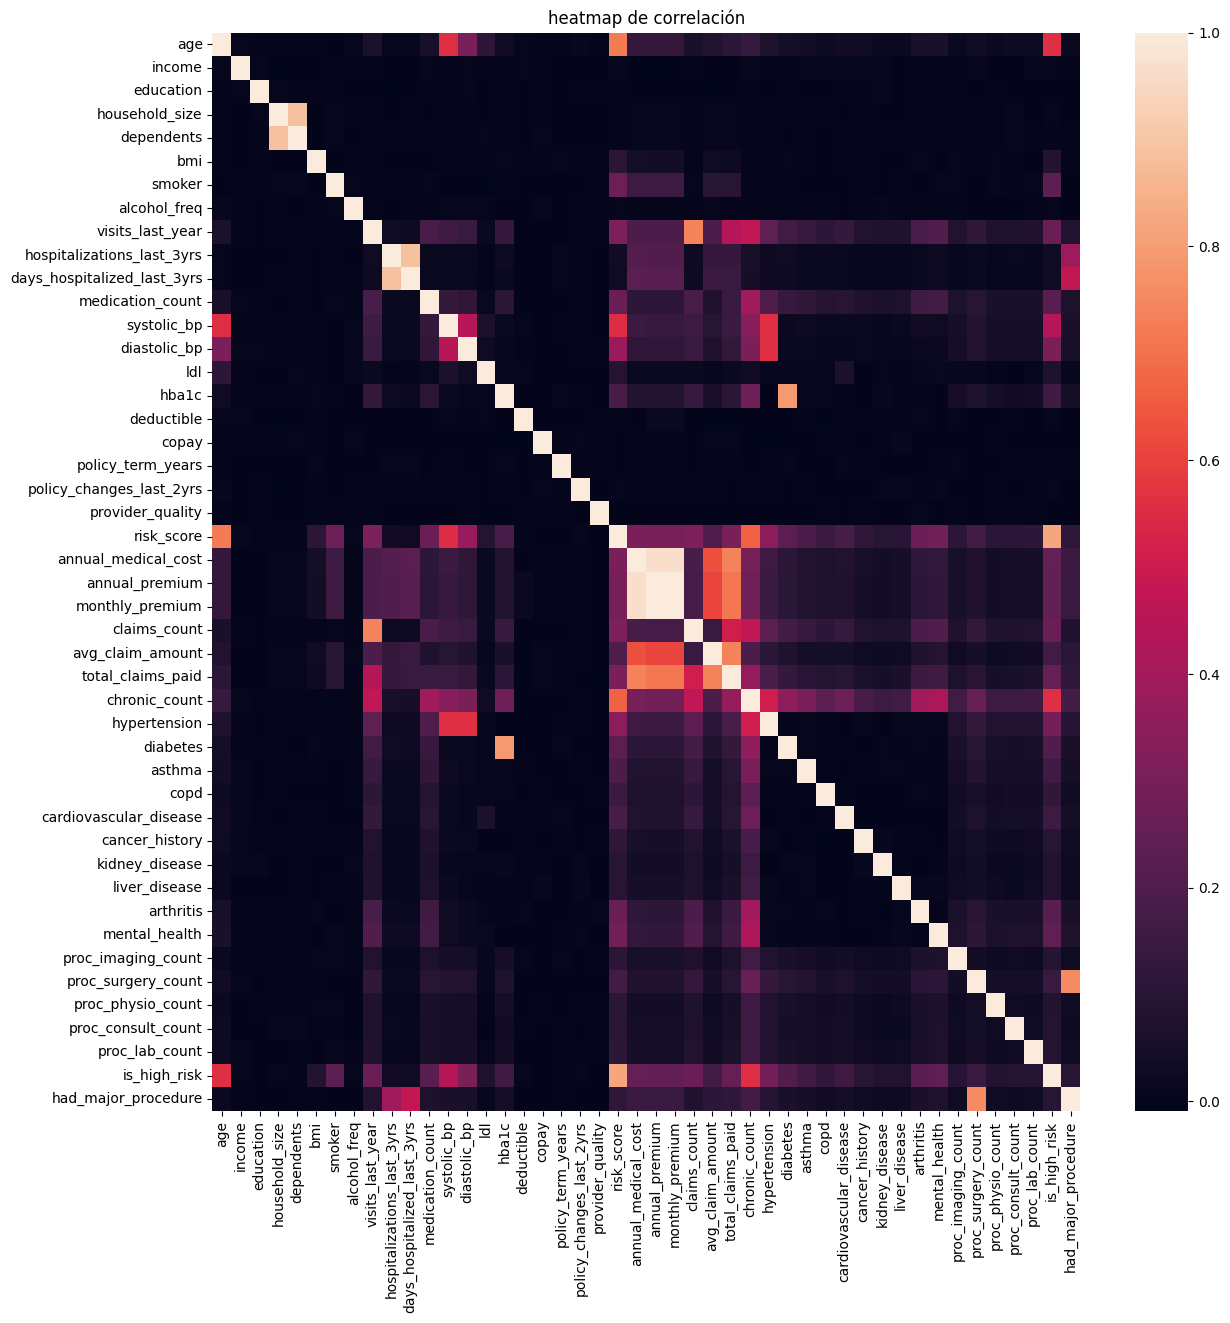

In [41]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.pop(0)
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, fmt=".2f", ax=ax)
ax.set_title("heatmap de correlación")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from umap import UMAP

c:\Users\Roxane\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [ ]:
RANDOM_STATE = 42
rng = np.random.RandomState(RANDOM_STATE)

X_num = df.select_dtypes(include=np.number).columns.tolist()
X_num.pop(0)

sc_insurance = StandardScaler().fit(df[X_num])
X_insurance_std = sc_insurance.transform(df[X_num])
pd.DataFrame(X_insurance_std)

In [29]:
pca = PCA(n_components=None, random_state=RANDOM_STATE).fit(X_insurance_std)

In [42]:
def scree_plot(pca, title='Scree plot'):
    fig, ax = plt.subplots(figsize=(15,4))
    exp = pca.explained_variance_ratio_
    cumsum_exp = np.cumsum(exp)
    ax.bar(range(1, len(exp)+1), exp, color='orange', label='Varianza explicada')
    ax.plot(range(1, len(exp)+1), cumsum_exp, '-o', color='red', label='Acumulada')
    ax.axhline(0.90, linestyle='--', color='gray', label='90% Acumulada')
    ax.set_xlabel('Nº componentes')
    ax.set_ylabel('Varianza Explicada')
    ax.set_xticks(range(1, len(exp)+1))
    ax.legend()
    ax.set_title(title)
    plt.show()

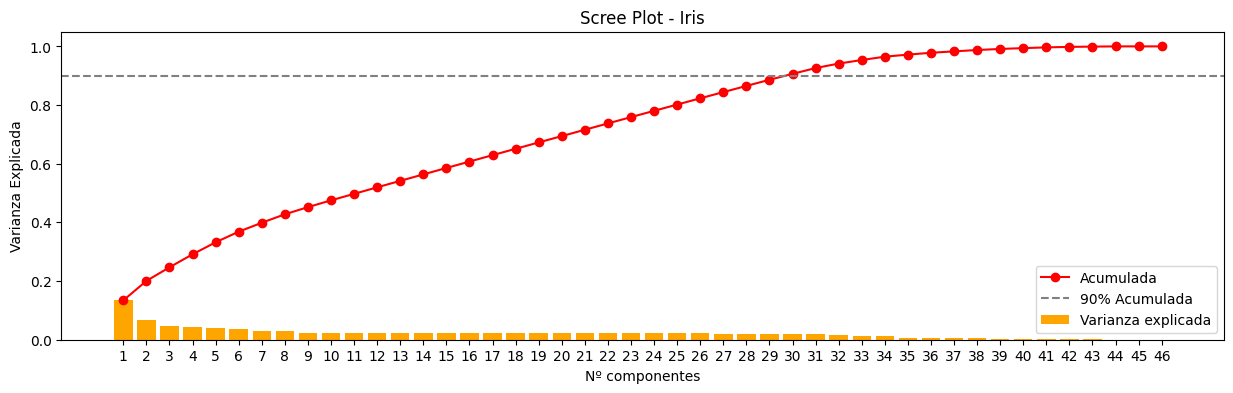

In [43]:
scree_plot(pca, title='Scree Plot - Iris')

In [32]:
def reconstruction_error(X_std, pca):
    X_proj = pca.transform(X_std)
    X_rec = pca.inverse_transform(X_proj)
    return np.mean((X_std - X_rec)**2)

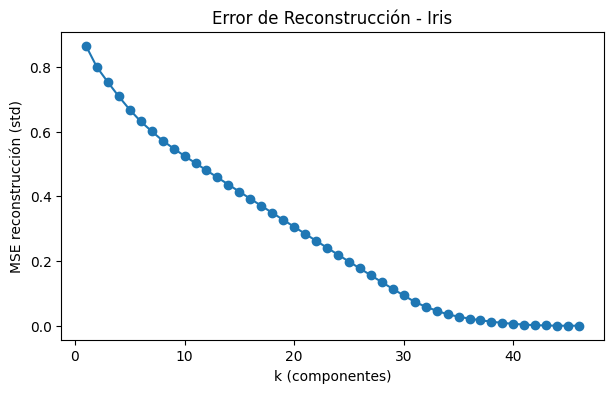

In [33]:
ks = range(1, X_insurance_std.shape[1]+1)
errs = []
for k in ks:
    p = PCA(n_components=k, random_state=RANDOM_STATE).fit(X_insurance_std)
    errs.append(reconstruction_error(X_insurance_std, p))

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(list(ks), errs, '-o')
ax.set_xlabel('k (componentes)')
ax.set_ylabel('MSE reconstrucción (std)')
ax.set_title('Error de Reconstrucción - Iris')
plt.show()

In [34]:
def loadings_df(pca, feature_names):
    comps = pd.DataFrame(pca.components_, columns=feature_names)
    comps.index = [f'PC{i+1}' for i in range(comps.shape[0])]
    return comps.T.sort_index()

In [35]:
components = loadings_df(pca, X_num)
components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
age,0.156822,-0.212917,-0.146458,0.320778,-0.005146,0.229204,-0.201306,-0.070722,0.246644,0.016905,...,-0.394059,0.181437,-0.000719,0.014935,-0.000496,0.024248,-0.015131,-0.486475,9.646726e-07,0.000000e+00
alcohol_freq,0.001754,-0.003700,-0.003949,0.003056,-0.002505,0.001251,-0.010891,-0.009078,0.043533,-0.038192,...,-0.000505,0.002259,0.001327,0.001882,-0.002886,-0.001247,0.000303,0.001841,-1.172849e-07,6.256329e-16
annual_medical_cost,0.293339,0.330079,-0.151475,0.024723,-0.007448,0.040946,-0.010024,0.080237,-0.069755,0.053873,...,0.003955,-0.000904,-0.006007,-0.000903,-0.002583,-0.005159,0.838035,-0.020962,-1.081453e-07,-1.638903e-15
annual_premium,0.289611,0.333232,-0.156084,0.025247,-0.007596,0.044165,-0.012050,0.085486,-0.076620,0.063363,...,0.013790,0.000396,-0.002479,-0.127190,0.004503,-0.002551,-0.377300,0.009280,-7.071066e-01,2.609997e-09
arthritis,0.111352,-0.065361,0.041924,-0.095937,0.002936,-0.126581,-0.189876,-0.072354,-0.088164,-0.083664,...,0.043150,0.027875,-0.008709,0.007009,-0.000076,-0.000962,-0.003864,-0.077572,1.049452e-08,-2.738456e-01
asthma,0.081071,-0.050401,0.047158,-0.073240,-0.000043,-0.095183,-0.150589,-0.044421,-0.125443,0.025254,...,0.033546,0.018489,-0.008414,0.002955,0.000498,-0.003656,-0.002038,-0.056775,-1.394820e-07,-2.074132e-01
avg_claim_amount,0.225102,0.278203,-0.146806,-0.020815,-0.003952,-0.007505,0.043501,0.082351,0.053174,0.004871,...,-0.014943,-0.010884,-0.025908,-0.421344,0.008391,0.014395,0.001932,-0.015675,1.949621e-07,6.760996e-16
bmi,0.021246,0.000998,-0.032714,0.018890,-0.010829,0.048570,-0.103904,0.001300,0.012400,-0.090386,...,-0.013118,-0.001431,0.001718,0.004588,0.001418,0.003776,-0.003998,-0.077895,-1.382558e-07,8.370084e-16
cancer_history,0.050163,-0.028028,0.019022,-0.035606,0.003098,-0.056648,-0.080464,-0.031013,-0.112255,-0.023743,...,0.021759,0.011709,-0.005365,0.002571,-0.000620,-0.001683,-0.002043,-0.033932,2.253563e-07,-1.278389e-01
cardiovascular_disease,0.074458,-0.042051,0.031337,-0.068509,-0.002016,-0.082285,-0.147543,-0.065016,0.176815,0.549781,...,0.027859,0.016817,-0.005670,0.004815,0.001993,-0.001728,-0.002791,-0.055252,1.462176e-09,-1.941630e-01


In [36]:
def scatter_2d(X2d, y=None, title=''):
    fig, ax = plt.subplots(figsize=(6,5))
    if y is None:
        ax.scatter(X2d[:,0], X2d[:,1], s=8, alpha=0.8)
    else:
        sc = ax.scatter(X2d[:,0], X2d[:,1], s=8, alpha=0.8, c=y)
        cbar = plt.colorbar(sc, ax=ax)
        cbar.set_label('y / etiqueta')
    ax.set_xlabel('Comp. 1')
    ax.set_ylabel('Comp. 2')
    ax.set_title(title)
    plt.show()

In [38]:
sample_idx = np.random.choice(len(X_insurance_std), 5000, replace=False)
X_sample = X_insurance_std[sample_idx]

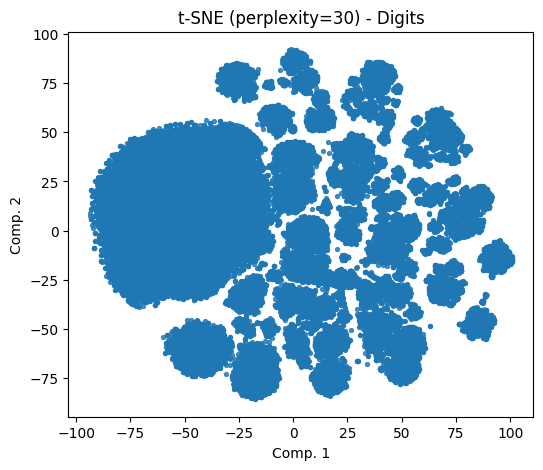

In [ ]:
#23minutos
tsne_30 = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=RANDOM_STATE)
X_t30 = tsne_30.fit_transform(X_insurance_std)
scatter_2d(X_t30, title='t-SNE (perplexity=30) - Digits')